In [453]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [456]:
# Number of pairs feature/label.
M = 10000

In [522]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(42)

# Input values (features)
x1 = 5.0*np.random.randn(M, 1)
x2 = np.random.randn(M, 1)

# Output values (targets).
y = 1.0*x1 + 1.0*x2 + np.random.randn(M, 1)

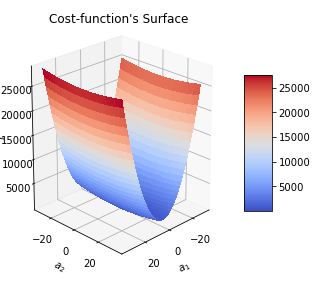

In [523]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-30.0, 34.0, N)
a2 = np.linspace(-30.0, 34.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    
    for iter2 in range(0, N):
        
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
    
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  );

# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$');

plt.title('Cost-function\'s Surface')

ax.view_init(20, 45)

#Show the plot.
plt.show()

In [524]:
# Closed-form solution.
X = np.c_[x1, x2]

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

yhat = X.dot(a_opt)

Joptimum = (1.0/M)*np.sum(np.power((y - yhat), 2))

In [530]:
# Gradient-descent solution.
maxNumIter = 10000

alpha = 0.01 # Valor empírico "ótimo".

# Create empty structures.
Jgd = np.zeros(maxNumIter+1)
a_hist = np.zeros((2, maxNumIter+1))

a = np.array([32.0, 32.0]).reshape(2, 1)

a_hist[:, 0] = a.reshape(2,)

yhat = X.dot(a)

Jgd[0] = (1.0/M)*np.sum(np.power(y - yhat, 2))

error = 1
it = 0
while(error > 0.001 and it < maxNumIter-1):
    
    h = X.dot(a)
    
    update = -(2.0/M)*X.T.dot(y - h)
    
    a = a - alpha*update
    
    a_hist[:, it+1] = a.reshape(2,)
    
    yhat = X.dot(a)

    Jgd[it+1] = (1.0/M)*sum(np.power((y - yhat), 2))
    
    error = np.abs(Jgd[it]-Jgd[it+1])
    
    it = it + 1

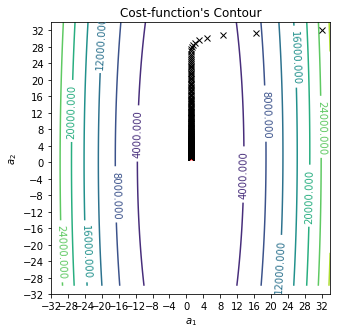

In [531]:
fig = plt.figure(figsize=(5,5))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:it], a_hist[1, 0:it], 'kx')

plt.xticks(np.arange(-32, 34, step=4.0))
plt.yticks(np.arange(-32, 34, step=4.0))
plt.show()

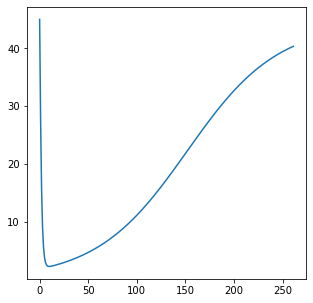

In [532]:
v = np.arctan(a_hist[0,0:it]/a_hist[1,0:it])*(180.0/np.pi)

fig = plt.figure(figsize=(5,5))
plt.plot(v)
plt.show()

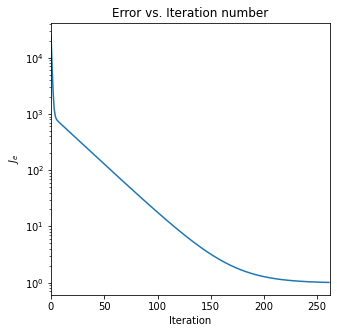

In [533]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, it), Jgd[0:it])
plt.xlim((0, it))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

In [534]:
print(a_opt[0])
print(a_opt[1])
print(a[0])
print(a[1])

[1.00533152]
[1.02660959]
[1.00560662]
[1.18088081]
